In [1]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii,fits
from scipy import interpolate
import grb_catalogs
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.table import Table
import healpy as hp
from pylab import cm
import matplotlib.colors as mpl_col
import ephem as eph
from bia_proposal_tools import *

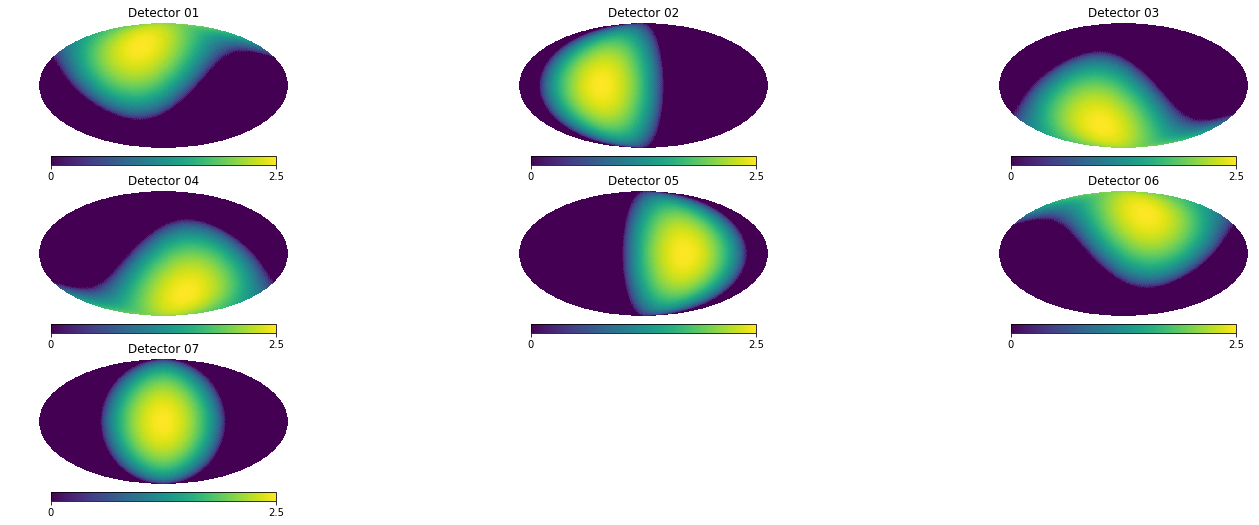

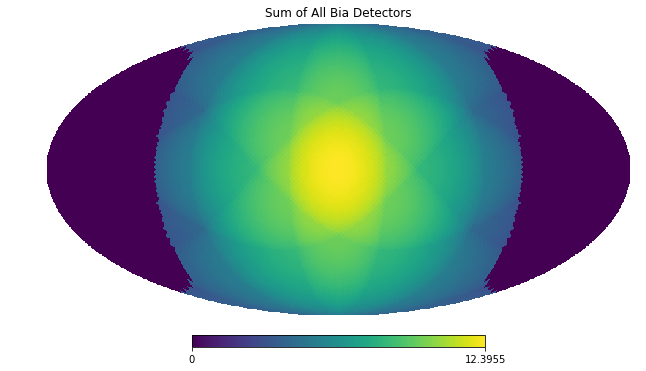

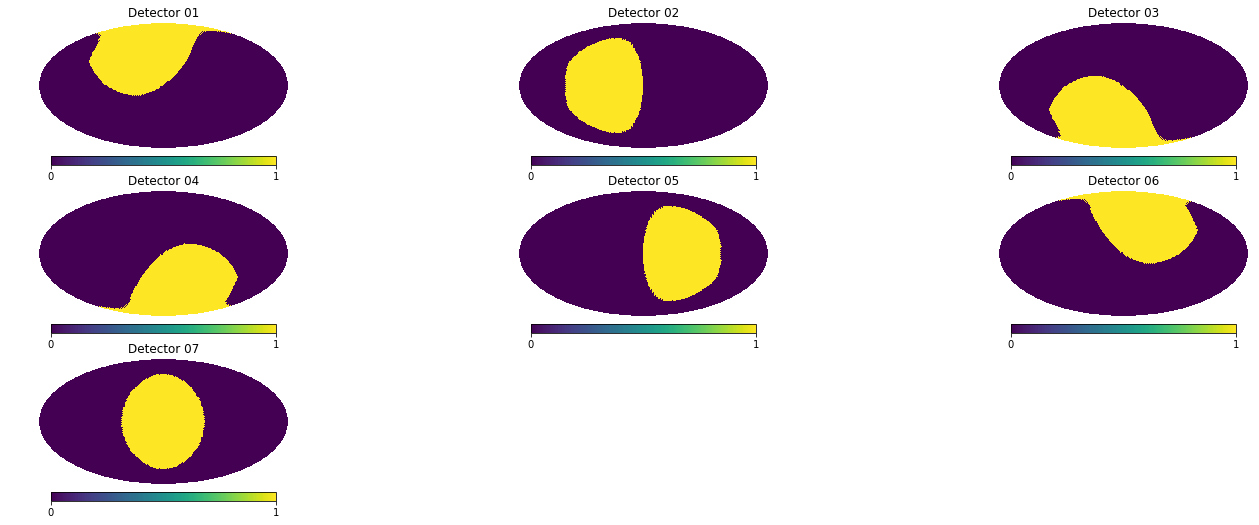

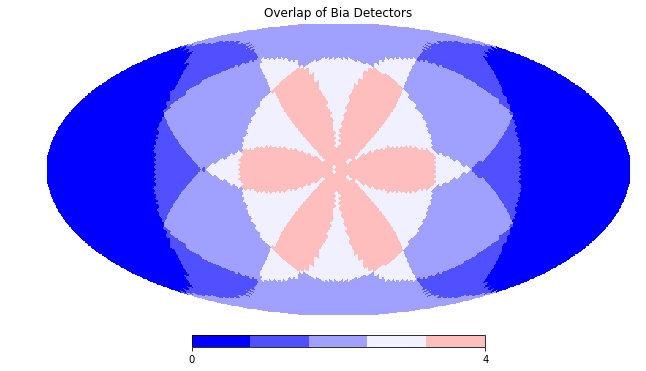

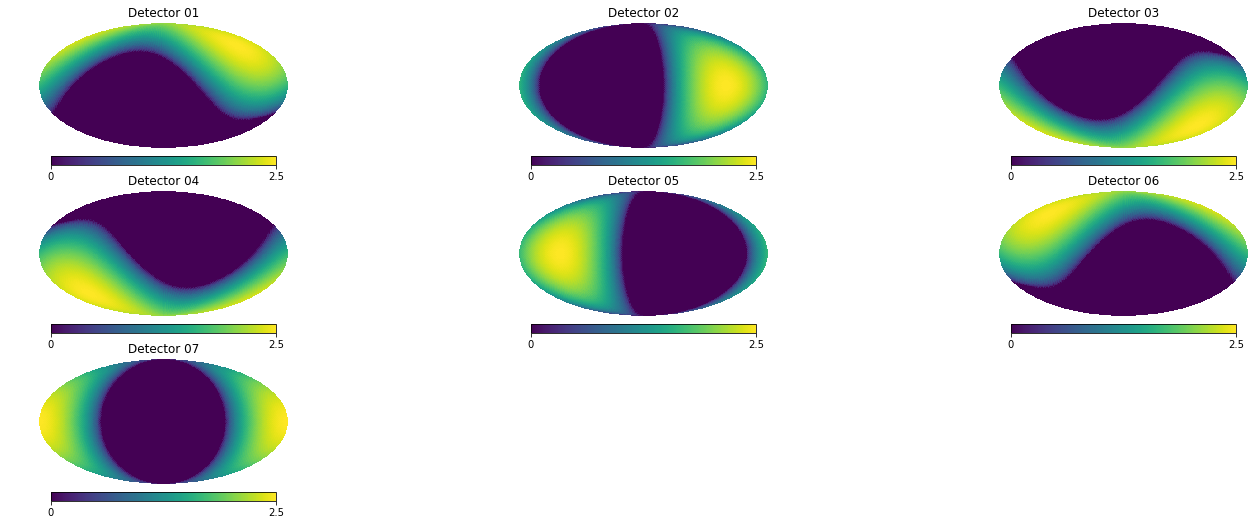

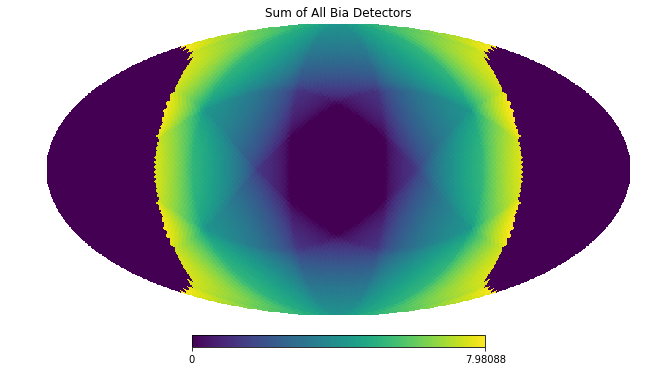

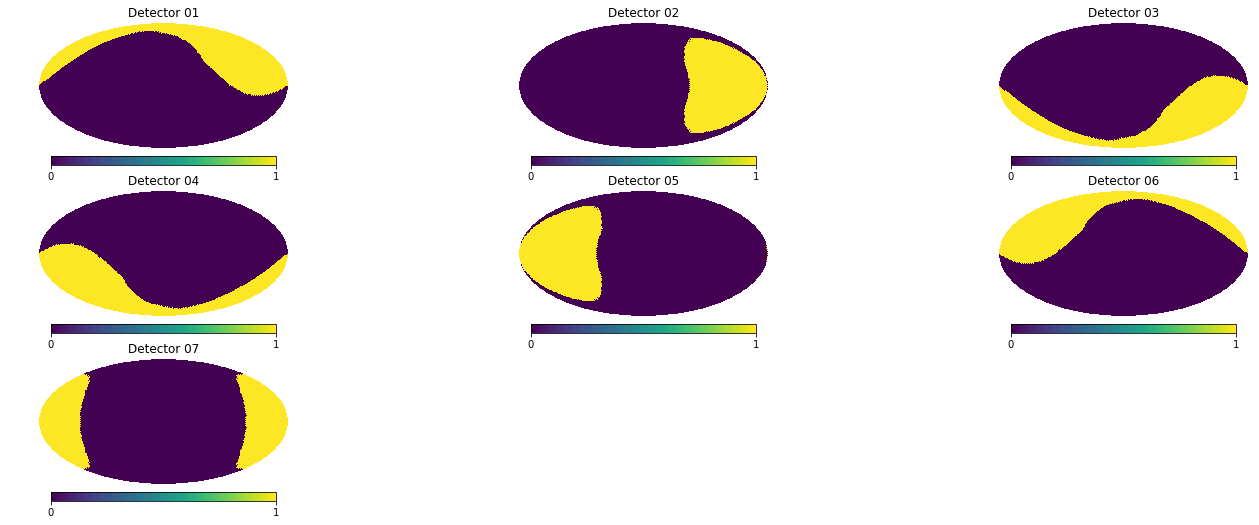

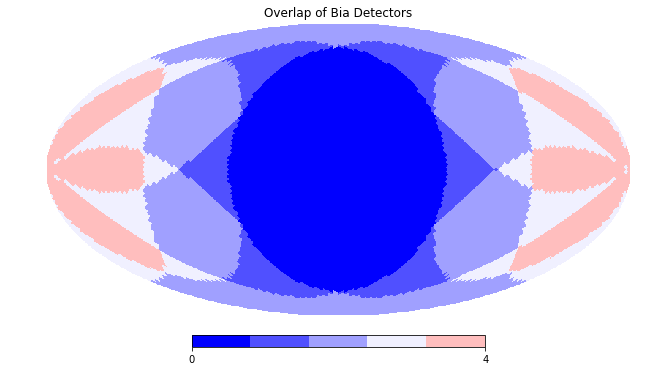

In [2]:
## setup Bia with 7 super detectors
bia_pointings = {'01': ('30:0:0','60:0:0'),
               '02': ('90:0:0','60:0:0'),
                '03': ('150:0:0','60:0:0'),
               '04': ('210:0:0','60:0:0'),
               '05': ('270:0:0','60:0:0'),
               '06': ('330:0:0','60:0:0'),
               '07': ('0:0:0','0:0:0')}

##### bia 
Aeff_fact=2.5
bia1,fs,exposure_positions,pointings,exposures=plot_exposures(bia_pointings,Aeff_fact,index=0.6) 
fs_det=num_detectors(bia1,exposure_positions,pointings)
bia_exposures1=exposures


##### bia 2
bia2,fs,exposure_positions,pointings,exposures=plot_exposures(bia_pointings,Aeff_fact,index=0.6,lat='00:00:00',lon='80:00:00') 
num_detectors(bia2,exposure_positions,pointings)
bia_exposures2=exposures

npointings=len(bia_pointings)*2

In [3]:
### make lookup table
npix=len(bia_exposures1[0])
lookup=np.zeros([npointings,npix])

In [4]:
# combine exposures for both Bia spacecrafts
biaexp=np.concatenate((bia_exposures1,bia_exposures2),axis=0)

In [5]:
print np.shape(biaexp)
print np.shape(lookup)

(14, 12288)
(14, 12288)


In [6]:
# fill in lookup table
for i in range(npix):
    for j in range(npointings):
        lookup[j,i]=biaexp[j,i]/max(biaexp[:,i])
print np.shape(lookup)

(14, 12288)


In [20]:
# select random position on the sky
# generate relative fluxes in detectors
# calc chisq relative to lookup table
# compare input to output position, and other bins that are also acceptable

In [40]:
### generate random points on the sky and their relative rates
n=1000
ra,dec=random_sky(n)
burst1 = np.array([[ detector.exposure(ra[i],dec[i], alt=-90.,index=0.8) for i in range(n)] for detector in bia1.detectors])
burst2 = np.array([[ detector.exposure(ra[i],dec[i], alt=-90.,index=0.8) for i in range(n)] for detector in bia2.detectors])
burst=np.concatenate((burst1,burst2),axis=0)

In [41]:
sep=[]
for j in range(n):

    chisq = np.array([np.sum((burst[:,j]-lookup[:,i])**2/(lookup[:,i]+1)) for i in range(len(lookup[0,:]))])
    w=np.where((chisq > 0) & (chisq<100.))[0]
    bestfit=w[np.argmin(chisq[w])]
    sep.append(separation(exposure_positions[0,bestfit],exposure_positions[1,bestfit],ra[j],dec[j]))
    
# for i in range(len(lookup[0,:])):
# #    w=np.where(lookup[:,i]>=0)[0]
#     c=np.sum((burst-lookup[:,i])**2/(lookup[:,i]+1))
#     chisq.append(c)
# chisq=np.array(chisq)

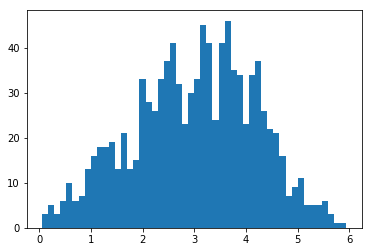

In [49]:
h=plot.hist(sep,bins=50)
plot.show()
# print lookup[:,0]-burst
# print np.shape(chisq)
# #cmap=colormap_skewed(chisq)
# hp.mollview(chisq)#,cmap=cmap)
# plot.plot(ra,dec,marker='o')
# plot.show()
# #print ra,dec

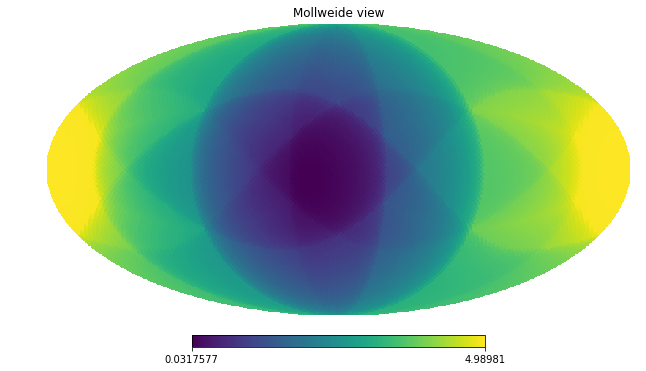

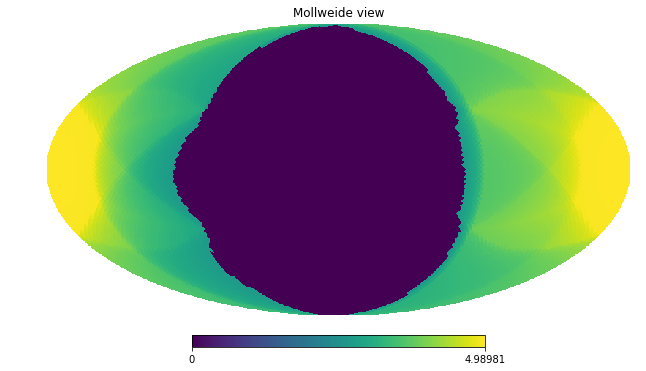

In [51]:
hp.mollview(chisq)
w=np.where(chisq <2.7)[0]
c=chisq
c[w]=0
hp.mollview(c)

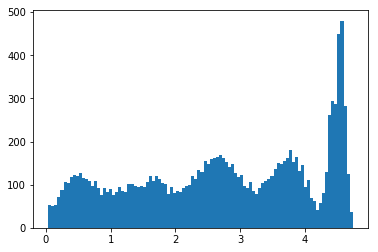

In [11]:
w=np.where((chisq > 0) & (chisq<100.))[0]
plot.figure()
plot.hist(chisq[w],bins=100)
plot.show()

In [12]:
print len(chisq[w])

12288


In [13]:
bestfit=w[np.argmin(chisq[w])]
print lookup[:,bestfit]
print burst
print exposure_positions[:,bestfit],ra,dec

[0.         0.         0.         0.         0.         0.40550749
 0.         0.77815379 1.         0.16018879 0.         0.86007108
 0.82833308 0.27954251]
[0.         0.         0.         0.         0.         0.23133582
 0.         0.67293015 0.9460777  0.1091489  0.         0.81352937
 0.76023859 0.23444533]
[202.5        -37.16889966] 199.14715048599084 -35.46517398307269


In [14]:
print separation(exposure_positions[0,bestfit],exposure_positions[1,bestfit],ra,dec)

3.1935872221414026
